<a href="https://colab.research.google.com/github/backiyalakshmi123/Deep-learning-and-techniques-lab/blob/main/EX_NO_3(neural_network_with_one_hidden_layer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 0.3674
Epoch 1000, Loss: 0.2488
Epoch 2000, Loss: 0.2422
Epoch 3000, Loss: 0.2007
Epoch 4000, Loss: 0.1303
Epoch 5000, Loss: 0.0571
Epoch 6000, Loss: 0.0289
Epoch 7000, Loss: 0.0174
Epoch 8000, Loss: 0.0113
Epoch 9000, Loss: 0.0077

Final Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


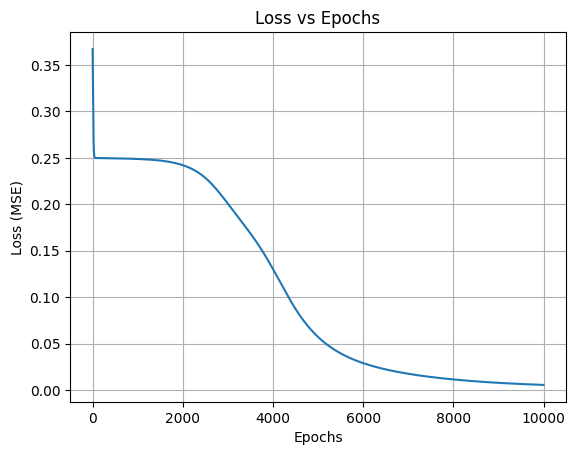

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Input data (XOR)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Output labels
y = np.array([[0], [1], [1], [0]])

# Set seed
np.random.seed(1)

# Initialize weights and biases
input_neurons = X.shape[1]
hidden_neurons = 4
output_neurons = 1

W1 = np.random.rand(input_neurons, hidden_neurons)
b1 = np.random.rand(1, hidden_neurons)
W2 = np.random.rand(hidden_neurons, output_neurons)
b2 = np.random.rand(1, output_neurons)

# Training settings
epochs = 10000
lr = 0.1
loss_list = []

for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Calculate error
    error = y - a2
    loss = np.mean(np.square(error))
    loss_list.append(loss)

    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)

    # Update weights and biases
    W2 += lr * d_W2
    b2 += lr * np.sum(d_a2, axis=0, keepdims=True)
    W1 += lr * d_W1
    b1 += lr * np.sum(d_a1, axis=0, keepdims=True)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Final predictions
print("\nFinal Predictions:")
print(a2.round())

# 📊 Plot the loss graph
plt.plot(loss_list)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()